In [1]:
# %matplotlib inline
# %matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
# from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)
import ast
import json

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os
from ast import literal_eval
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


# Helper Functions

In [2]:
def import_pickle_data(filename):
    

    with open(filename,'rb') as file:
        data = pkl.load(file)

    return data




In [3]:
def import_2019_data():
    import pickle as pkl
    hh_all_2019_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2019_hh_trials_all.pickle'

    with open(hh_all_2019_file,'rb') as file:
        humans_2019_file = pkl.load(file)

    humans_2019_file.to_csv('humans_all_2019.csv')
    old_trials = humans_2019_file
    return old_trials

def import_2020_data():
    import pickle as pkl
    hh_all_2020_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2020_hh_trials_all.pickle'

    with open(hh_all_2020_file,'rb') as file:
        humans_2020_file = pkl.load(file)

    humans_2020_file.to_csv('humans_all_2020.csv')
    new_trials = humans_2020_file
    return new_trials






In [4]:
def json_eval(s):
    json_acceptable_string = s.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return d

# Take A Look At Rolled-Out Trajectories

In [6]:
# filename = '../experiments/saved_eval_trajs/bc_train_and_bc_test_0.pkl'
filename = '../ppo/rollout_trajs/bc_ppo_seed516_n100_rollouts1.pkl'
train_test_rollout = import_pickle_data(filename)


In [7]:
train_test_rollout.keys()

dict_keys(['ep_observations', 'ep_actions', 'ep_rewards', 'ep_dones', 'ep_returns', 'ep_returns_sparse', 'ep_lengths', 'mdp_params', 'env_params'])

In [8]:
ep_rewards = train_test_rollout['ep_rewards']
ep_returns = train_test_rollout['ep_returns']
ep_returns_sparse = train_test_rollout['ep_returns_sparse']
ep_lengths = train_test_rollout['ep_lengths'] # all 400
# ep_returns == ep_returns_sparse


(array([ 2.,  7., 10.,  0., 23., 27.,  0., 26.,  2.,  3.]),
 array([  0.,  14.,  28.,  42.,  56.,  70.,  84.,  98., 112., 126., 140.]),
 <BarContainer object of 10 artists>)

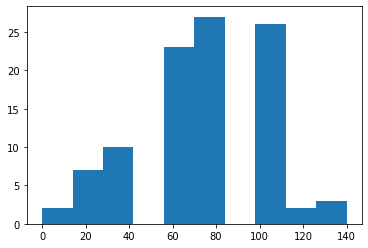

In [9]:
plt.hist(ep_returns_sparse)

In [10]:
ep_observations = train_test_rollout['ep_observations']
ep_actions = train_test_rollout['ep_actions']


In [11]:
ep_actions

array([[((0, 1), (0, 0)), ((1, 0), (0, 0)), ((0, 1), (0, -1)), ...,
        ('interact', (0, 0)), ('interact', (0, 0)), ((0, 1), (0, -1))],
       [((-1, 0), (0, 0)), ((1, 0), (0, 0)), ('interact', (0, -1)), ...,
        ('interact', (0, 0)), ('interact', 'interact'),
        ('interact', (0, 0))],
       [((0, 1), (0, 0)), ('interact', (0, -1)), ((1, 0), (-1, 0)), ...,
        ('interact', (0, 0)), ((0, 1), (1, 0)), ((-1, 0), 'interact')],
       ...,
       [((0, 1), (0, 0)), ((-1, 0), (0, 0)), ('interact', (0, 0)), ...,
        ((0, -1), (0, 0)), ((1, 0), (-1, 0)), ((0, 1), (0, 0))],
       [((0, 1), (0, 0)), ((0, -1), (0, 0)), ((-1, 0), (0, 0)), ...,
        ((-1, 0), 'interact'), ('interact', 'interact'),
        ((0, -1), (1, 0))],
       [((0, 0), (0, 0)), ((1, 0), (0, 0)), ((1, 0), (0, 0)), ...,
        ('interact', (0, 0)), ('interact', 'interact'),
        ('interact', (0, 0))]], dtype=object)

In [12]:
episode_num = 0
timestep_t = 0
# for timestep_t in range(len(ep_observations[episode_num])):
for timestep_t in range(100):
    print(ep_observations[episode_num][timestep_t].to_dict())
#     print('players', ep_observations[episode_num][timestep_t].players)
#     print('observations', ep_observations[episode_num][timestep_t].objects)
#     print('order list', ep_observations[episode_num][timestep_t].order_list)

# self.players = tuple(players)
# self.objects = objects
# self.order_list = order_list



{'players': [{'position': (3, 1), 'orientation': (0, -1), 'held_object': None}, {'position': (1, 2), 'orientation': (0, -1), 'held_object': None}], 'objects': [], 'order_list': None}
{'players': [{'position': (3, 2), 'orientation': (0, 1), 'held_object': None}, {'position': (1, 2), 'orientation': (0, -1), 'held_object': None}], 'objects': [], 'order_list': None}
{'players': [{'position': (3, 2), 'orientation': (1, 0), 'held_object': None}, {'position': (1, 2), 'orientation': (0, -1), 'held_object': None}], 'objects': [], 'order_list': None}
{'players': [{'position': (3, 3), 'orientation': (0, 1), 'held_object': None}, {'position': (1, 1), 'orientation': (0, -1), 'held_object': None}], 'objects': [], 'order_list': None}
{'players': [{'position': (3, 2), 'orientation': (0, -1), 'held_object': None}, {'position': (1, 1), 'orientation': (0, -1), 'held_object': None}], 'objects': [], 'order_list': None}
{'players': [{'position': (3, 1), 'orientation': (0, -1), 'held_object': None}, {'positi

# Define Functions For Plotting

In [13]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.patches import Rectangle, Arrow, FancyArrow


# N_steps = len(p2_data)
# a_min = 1    # the minimial value of the paramater a
# a_max = N_steps-1   # the maximal value of the paramater a
# a_init = 1   # the value of the parameter a to be used initially, when the graph is created

# t = np.linspace(1, N_steps-1, N_steps-1)


def f_p1(t, a, p1_data):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a, p2_data):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]



def arrow_p1(t, a, p1_data):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def arrow_p2(t, a, p2_data):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


def held_p1(t, a, p1_data):
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def held_p2(t, a, p2_data):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


def world_obj(t, a, objects_data):
    obj_world = objects_data[int(a)]
    if len(obj_world)==0:
        return []
    objects_list = []
    for i in range(len(obj_world)):
        obj = obj_world[i]
        name = obj_world[i]['name']
        obj_state = obj_world[i]['state']
        position = obj_world[i]['position']
        if name == 'onion':
            color = 'y'
            objects_list.append((position[0], position[1], color))
        if name == 'dish':
            color = 'k'
            objects_list.append((position[0], position[1], color))
        if name == 'soup':
            if obj_state[1] == 3 and obj_state[2] < 20:
#             if obj['is_cooking'] is True:
                color = 'r'
            elif obj_state[1] == 3 and obj_state[2] == 20:
#             elif obj['is_ready'] is True:
                color = 'g'
            else:
                color = 'orange'
            objects_list.append((position[0], position[1], color))
        
    return objects_list


def obj_p1(t, a, p1_data):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    color = 'k'
    if p1_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p1_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'k'
        elif name == 'onion':
            color = 'y'
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1], p1_data[int(a)]['held_object']['name'], color

def obj_p2(t, a, p2_data):
    color = 'k'
    if p2_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p2_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'k'
        elif name == 'onion':
            color = 'y'
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1], p2_data[int(a)]['held_object']['name'], color


# [{'name': 'soup',
#    'position': [4, 1],
#    '_ingredients': [{'name': 'onion', 'position': [4, 1]},
#     {'name': 'onion', 'position': [4, 1]}],
#    'cooking_tick': -1,
#    'is_cooking': False,
#    'is_ready': False,
#    'is_idle': True,
#    'cook_time': -1,
#    '_cooking_tick': -1}],



In [14]:

def plot_trial(trial_id, p1_data, p2_data, objects_data, name, title):
        
    N_steps = len(p1_data)
    a_min = 1    # the minimial value of the paramater a
    a_max = N_steps-1   # the maximal value of the paramater a
    a_init = 1   # the value of the parameter a to be used initially, when the graph is created

    t = np.linspace(0, N_steps-1, N_steps)
    
    old_trials = import_2019_data()
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout = np.array([list(elem) for elem in layout])
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [91,153,91]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]


    # loop over your images
    for a in range(len(t)):

        fig = plt.figure(figsize=(8,3))

        sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])

        plt.axes(sin_ax) # select sin_ax

        plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)


        scat1 = plt.scatter(f_p1(t, a, p1_data)[0], f_p1(t, a, p1_data)[1], lw=20, c='r')
        line1, = plt.plot(f_p1(t, a, p1_data)[0], f_p1(t, a, p1_data)[1], lw=5, c='r')

        arrow1 = plt.arrow(arrow_p1(t, a, p1_data)[0], arrow_p1(t, a, p1_data)[1], 
                           arrow_p1(t, a, p1_data)[2], arrow_p1(t, a, p1_data)[3], head_width=0.5,
                           head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

        if obj_p1(t, a, p1_data)[0] is not None:
            arrow_obj1 = plt.scatter(obj_p1(t, a, p1_data)[0], obj_p1(t, a, p1_data)[1], 
                                     lw=10, c=obj_p1(t, a, p1_data)[3])


        scat2 = plt.scatter(f_p2(t, a, p2_data)[0], f_p2(t, a, p2_data)[1], lw=20, c='b')
        line2, = plt.plot(f_p2(t, a, p2_data)[0], f_p2(t, a, p2_data)[1], lw=5, c='b')

        arrow2 = plt.arrow(arrow_p2(t, a, p2_data)[0], arrow_p2(t, a, p2_data)[1], 
                           arrow_p2(t, a, p2_data)[2], arrow_p2(t, a, p2_data)[3], head_width=0.5,
                           head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)

        if obj_p2(t, a, p2_data)[0] is not None:
            arrow_obj2 = plt.scatter(obj_p2(t, a, p2_data)[0], obj_p2(t, a, p2_data)[1], 
                                     lw=10, c=obj_p2(t, a, p2_data)[3])

        objects_list = world_obj(t, a, objects_data)
        for obj in objects_list:
            obj_add = plt.scatter(obj[0], obj[1], 
                                     lw=10, c=obj[2])

        trial_name = name + '_'+str(trial_id)
        if not os.path.exists(trial_name):
            os.makedirs(trial_name)

        plt.savefig(trial_name+'/im_'+str(a)+'.png')
        plt.close()


# Attempt to Plot

In [15]:
for ep_no in range(len(ep_returns)):
    if ep_returns[ep_no] > 60:
        print(ep_no)

1
2
3
4
5
6
7
10
12
16
17
18
21
22
23
25
27
28
29
30
33
34
35
36
38
39
40
41
44
45
46
47
50
52
53
54
59
62
64
65
66
67
69
70
71
73
74
77
78
83
87
89
90
92
93
95
96
97


In [16]:
episode_num = 40
timestep_t = 0
state_data = []
print('REWARD: ', ep_returns[episode_num])
for timestep_t in range(len(ep_observations[episode_num])):

# for timestep_t in range(100):
    state_data.append(ep_observations[episode_num][timestep_t].to_dict())
#     print('players', ep_observations[episode_num][timestep_t].players)
#     print('observations', ep_observations[episode_num][timestep_t].objects)
#     print('order list', ep_observations[episode_num][timestep_t].order_list)

# self.players = tuple(players)
# self.objects = objects
# self.order_list = order_list



REWARD:  80.0


In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def plot_rollout(episode_num):
    old_trials = import_2019_data()
    layout_trials = old_trials[old_trials['layout_name']=='random0']['trial_id'].unique()
    name = 'random0'
    title = 'Forced Coordination'

    
    trial_id = episode_num
    timestep_t = 0
    state_data = []
    print('REWARD: ', ep_returns[episode_num])
    for timestep_t in range(len(ep_observations[episode_num])):

        state_data.append(ep_observations[episode_num][timestep_t].to_dict())
    
    p1_data = []
    p2_data = []
    objects_data = []
    state_data_eval = []
    for i in range(1, len(state_data)):
    #     prev_state_x = json_eval(state_data[i-1])
    #     state_x = json_eval(state_data[i])
        prev_state_x = state_data[i-1]
        state_x = state_data[i]
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)


In [17]:
episode_num = 50
plot_rollout(episode_num)


REWARD:  20.0


In [18]:
np.mean([24.0, 26.5, 20.5, 31.5, 13.5])

23.2

In [19]:
np.mean([38.0, 42.0, 35.5, 63.0, 11.0])

37.9

# Evaluate on Getting Stuck

In [17]:
# filename = '../experiments/saved_eval_trajs/bc_train_and_bc_test_0.pkl'
filename = '../ppo/rollout_trajs/bc_ppo_seed516_n100_rollouts1.pkl'
train_test_rollout = import_pickle_data(filename)

ep_rewards = train_test_rollout['ep_rewards']
ep_returns = train_test_rollout['ep_returns']
ep_returns_sparse = train_test_rollout['ep_returns_sparse']
ep_lengths = train_test_rollout['ep_lengths'] # all 400

ep_observations_orig = train_test_rollout['ep_observations']
ep_actions = train_test_rollout['ep_actions']

# episode_num = 0
# timestep_t = 0
ep_observations = []
# for timestep_t in range(len(ep_observations[episode_num])):
for episode_num in range(100):
    ep_observations.append([ep_observations_orig[episode_num][timestep_t].to_dict() for timestep_t in range(len(ep_observations_orig[episode_num]))])


In [18]:
ep_actions[0]

array([((0, 1), (0, 0)), ((1, 0), (0, 0)), ((0, 1), (0, -1)),
       ((0, -1), (0, -1)), ((0, -1), (0, -1)), ((0, -1), (-1, 0)),
       ((-1, 0), (0, 0)), ((-1, 0), (0, 0)), ((1, 0), 'interact'),
       ((-1, 0), (1, 0)), ('interact', 'interact'), ((-1, 0), (0, 0)),
       ((-1, 0), (0, 0)), ('interact', (-1, 0)), ((0, -1), (0, 0)),
       ('interact', 'interact'), ((-1, 0), (0, 0)), ('interact', (1, 0)),
       ('interact', (0, 0)), ((-1, 0), (0, 0)), ('interact', (0, 0)),
       ('interact', 'interact'), ((-1, 0), (-1, 0)), ((-1, 0), (0, 0)),
       ((-1, 0), (0, 0)), ((-1, 0), (0, 0)), ((-1, 0), 'interact'),
       ('interact', (1, 0)), ((0, -1), (0, 0)), ('interact', 'interact'),
       ((-1, 0), 'interact'), ('interact', (1, 0)), ('interact', (0, 0)),
       ('interact', (-1, 0)), ((-1, 0), (0, 0)), ('interact', (1, 0)),
       ('interact', (0, 0)), ((-1, 0), (0, 0)), ('interact', (0, 0)),
       ('interact', 'interact'), ((-1, 0), (-1, 0)),
       ((-1, 0), 'interact'), ('interac

In [19]:
def count_actions(actions_list):
    num_actions = 0
    num_stationary = 0
  
    for i in range(1, len(actions_list)):
#         step_time = time_elapsed[i] - time_elapsed[i-1]
        if actions_list[i] == [0,0]:
            num_stationary += 1
#             time_stationary += step_time
        else:
            num_actions += 1
#             time_actions += step_time
    return num_actions, num_stationary
    

In [20]:
def check_fails(state_list, human_index, robot_index, human_actions, robot_actions):
    n_human_fails = 0
    n_robot_fails = 0
    for i in range(len(state_list)-1):
        curr_human_state = state_list[i]['players'][human_index]
        curr_robot_state = state_list[i]['players'][robot_index]
        next_human_state = state_list[i+1]['players'][human_index]
        next_robot_state = state_list[i+1]['players'][robot_index]
        

        human_act = human_actions[i]
        robot_act = robot_actions[i]

        if human_act != [0,0]:

            if next_human_state == curr_human_state:
                n_human_fails += 1
    #             print('problem with HUMAN')
    #             print('curr_human_state', curr_human_state)
    #             print('next_human_state', next_human_state)
    #             print('human_act', human_act)
    #             print()
        if robot_act != [0,0]:

            if next_robot_state == curr_robot_state:
                n_robot_fails += 1
    #             print('problem with ROBOT')
    #             print('curr_robot_state', curr_robot_state)
    #             print('next_robot_state', next_robot_state)
    #             print('robot_act', robot_act)
    #             print()

    # print('n_human_fails = ', n_human_fails)
    # print('n_robot_fails = ', n_robot_fails)
    return n_human_fails, n_robot_fails



In [21]:
def check_getting_stuck(state_list, human_index, robot_index, human_actions, robot_actions):
    n_human_stuck = 0
    n_robot_stuck = 0
    
    bool_human_stuck = False
    bool_robot_stuck = False
    
    counter_human_stuck = 0
    counter_robot_stuck = 0
    
    for i in range(len(state_list)-1):
        curr_human_state = state_list[i]['players'][human_index]
        curr_robot_state = state_list[i]['players'][robot_index]
        

        next_human_state = state_list[i+1]['players'][human_index]
        next_robot_state = state_list[i+1]['players'][robot_index]
        

        human_act = human_actions[i]
        robot_act = robot_actions[i]

        if human_act != [0,0]:

            if next_human_state == curr_human_state:
                if bool_human_stuck == False:
                    n_human_stuck += 1
                    bool_human_stuck = True
                else:
                    counter_human_stuck += 1
                    if counter_human_stuck > 5:
                        n_human_stuck += 1
                        counter_human_stuck  = 0
            else:
                if bool_human_stuck == True:
                    bool_human_stuck = False
                    counter_human_stuck = 0
    #             print('problem with HUMAN')
    #             print('curr_human_state', curr_human_state)
    #             print('next_human_state', next_human_state)
    #             print('human_act', human_act)
    #             print()
        if robot_act != [0,0]:

            if next_robot_state == curr_robot_state:
                if bool_robot_stuck == False:
                    n_robot_stuck += 1
                    bool_robot_stuck = True
                else:
                    counter_robot_stuck += 1
                    if counter_robot_stuck > 5:
                        n_robot_stuck += 1
                        counter_robot_stuck  = 0
            else:
                if bool_robot_stuck == True:
                    bool_robot_stuck = False
                    counter_robot_stuck = 0
    #             print('problem with ROBOT')
    #             print('curr_robot_state', curr_robot_state)
    #             print('next_robot_state', next_robot_state)
    #             print('robot_act', robot_act)
    #             print()

    # print('n_human_fails = ', n_human_fails)
    # print('n_robot_fails = ', n_robot_fails)
    return n_human_stuck, n_robot_stuck



In [22]:
# old_trials = import_2019_data()
#     layout_trials = old_trials[old_trials['layout_name']=='random0']
# worker_ids = bc_trials['workerid_num'].unique()
# filename = '../experiments/saved_eval_trajs/bc_train_and_bc_test_0.pkl'
filename = '../experiments/saved_eval_trajs/bc_train_and_bc_test_0_ex3.pkl'
train_test_rollout = import_pickle_data(filename)

ep_rewards = train_test_rollout['ep_rewards']
ep_returns = train_test_rollout['ep_returns']
ep_returns_sparse = train_test_rollout['ep_returns_sparse']
ep_lengths = train_test_rollout['ep_lengths'] # all 400

ep_observations_orig = train_test_rollout['ep_observations']
ep_actions = train_test_rollout['ep_actions']

# episode_num = 0
# timestep_t = 0
ep_observations = []
# for timestep_t in range(len(ep_observations[episode_num])):
for episode_num in range(100):
    ep_observations.append([ep_observations_orig[episode_num][timestep_t].to_dict() for timestep_t in range(len(ep_observations_orig[episode_num]))])


# human index = 0, bc train on right, serving
# robot index = 1, bc test on left, dispensing
work_distribution_data = {}

for trial_no in range(100):
    work_distribution_data[trial_no] = {}
#     bc_player_trial = bc_trials[bc_trials['workerid_num']==trial_no]
    joint_actions_in_trial = ep_actions[trial_no]
    
#     time_elapsed_in_trial = bc_player_trial['time_elapsed'].to_numpy()
    scores = ep_returns_sparse[trial_no]
    final_score = scores

    human_index = 0
    robot_index = 1
    
    human_actions = [elem[human_index] for elem in joint_actions_in_trial]
    robot_actions = [elem[robot_index] for elem in joint_actions_in_trial]
    
    state_list = ep_observations[trial_no]

    n_human_fails, n_robot_fails = check_fails(state_list, human_index, robot_index, human_actions, robot_actions)
    n_human_stuck, n_robot_stuck = check_getting_stuck(state_list, human_index, robot_index, human_actions, robot_actions)
    
    h_num_actions, h_num_stationary = count_actions(human_actions)
    r_num_actions, r_num_stationary = count_actions(robot_actions)

    work_distribution_data[trial_no]['score'] = final_score
    work_distribution_data[trial_no]['h_num_actions'] = h_num_actions
    work_distribution_data[trial_no]['h_num_stationary'] = h_num_stationary
#     work_distribution_data[trial_no]['h_time_actions'] = h_time_actions
#     work_distribution_data[trial_no]['h_time_stationary'] = h_time_stationary
    work_distribution_data[trial_no]['r_num_actions'] = r_num_actions
    work_distribution_data[trial_no]['r_num_stationary'] = r_num_stationary
#     work_distribution_data[trial_no]['r_time_actions'] = r_time_actions
#     work_distribution_data[trial_no]['r_time_stationary'] = r_time_stationary
    
    work_distribution_data[trial_no]['n_human_fails'] = n_human_fails
    work_distribution_data[trial_no]['n_robot_fails'] = n_robot_fails
    work_distribution_data[trial_no]['n_human_stuck'] = n_human_stuck
    work_distribution_data[trial_no]['n_robot_stuck'] = n_robot_stuck
    
    


# Plot Outputs

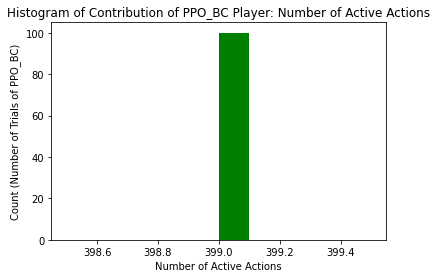

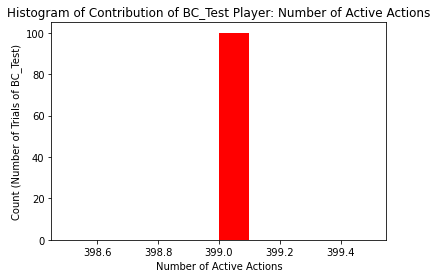

In [36]:
h_time_actions = [work_distribution_data[trial_no]['h_num_actions'] for trial_no in work_distribution_data]
r_time_actions = [work_distribution_data[trial_no]['r_num_actions'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.hist(h_time_actions, alpha=1, bins=10, color='g')
plt.title("Histogram of Contribution of PPO_BC Player: Number of Active Actions")
plt.xlabel("Number of Active Actions")
plt.ylabel("Count (Number of Trials of PPO_BC)")
# plt.xlim(0,61)
plt.show()

plt.hist(r_time_actions, alpha=1, bins=10, color='r')
plt.title("Histogram of Contribution of BC_Test Player: Number of Active Actions")
plt.xlabel("Number of Active Actions")
plt.ylabel("Count (Number of Trials of BC_Test)")
# plt.xlim(0,61)
plt.show()


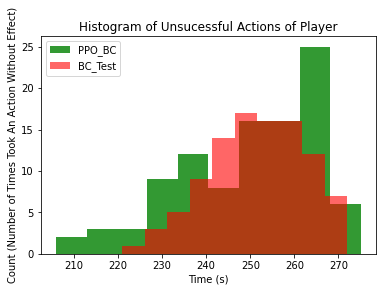

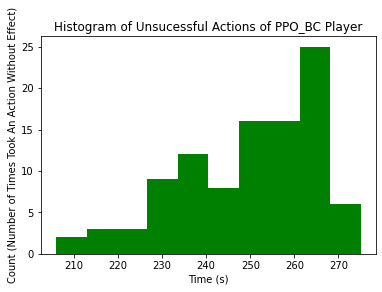

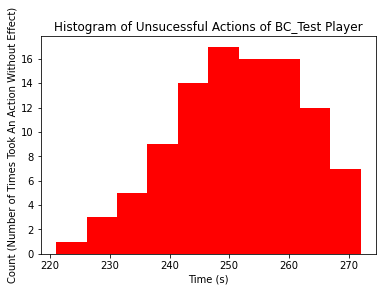

In [29]:
n_human_fails = [work_distribution_data[trial_no]['n_human_fails'] for trial_no in work_distribution_data]
n_robot_fails = [work_distribution_data[trial_no]['n_robot_fails'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()
plt.hist(n_human_fails, alpha=0.8, bins=10, color='g')
plt.hist(n_robot_fails, alpha=0.6, bins=10, color='r')
plt.legend(['PPO_BC', 'BC_Test'])
plt.title("Histogram of Unsucessful Actions of Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Took An Action Without Effect)")
plt.show()

plt.hist(n_human_fails, alpha=1, bins=10, color='g')
plt.title("Histogram of Unsucessful Actions of PPO_BC Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()

plt.hist(n_robot_fails, alpha=1, bins=10, color='r')
plt.title("Histogram of Unsucessful Actions of BC_Test Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()


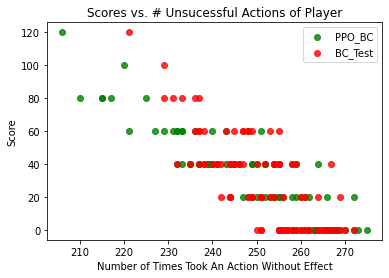

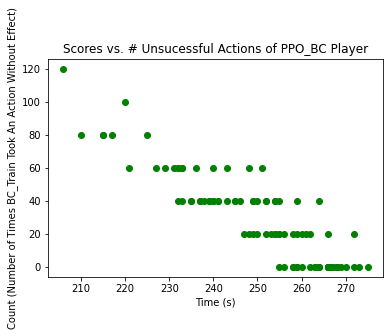

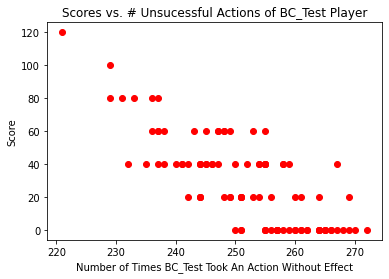

In [35]:
n_human_fails = [work_distribution_data[trial_no]['n_human_fails'] for trial_no in work_distribution_data]
n_robot_fails = [work_distribution_data[trial_no]['n_robot_fails'] for trial_no in work_distribution_data]
scores = [work_distribution_data[trial_no]['score'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.scatter(n_human_fails, scores, color='g', alpha=0.8)
plt.scatter(n_robot_fails, scores, color='r', alpha=0.8)
plt.title("Scores vs. # Unsucessful Actions of Player")
plt.xlabel("Number of Times Took An Action Without Effect")
plt.ylabel("Score")
plt.legend(['PPO_BC', 'BC_Test'])
# plt.xlim(0,61)
plt.show()



plt.scatter(n_human_fails, scores, color='g')
plt.title("Scores vs. # Unsucessful Actions of PPO_BC Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times BC_Train Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()

plt.scatter(n_robot_fails, scores, color='r')
plt.title("Scores vs. # Unsucessful Actions of BC_Test Player")
plt.xlabel("Number of Times BC_Test Took An Action Without Effect")
plt.ylabel("Score")
# plt.xlim(0,61)
plt.show()


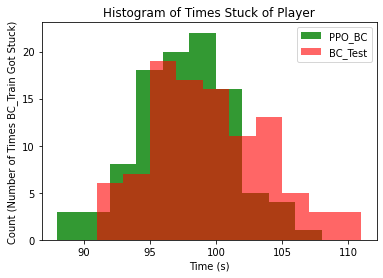

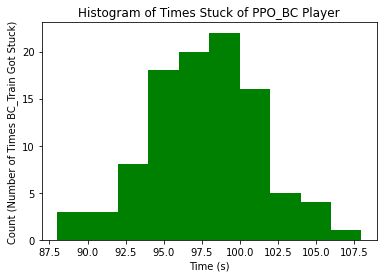

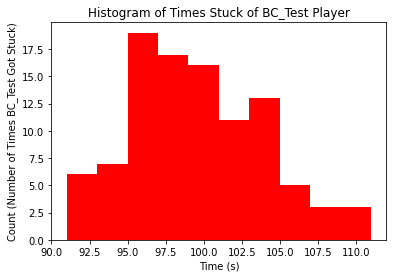

In [31]:
n_human_stuck = [work_distribution_data[trial_no]['n_human_stuck'] for trial_no in work_distribution_data]
n_robot_stuck = [work_distribution_data[trial_no]['n_robot_stuck'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.hist(n_human_stuck, alpha=0.8, bins=10, color='g', )
plt.hist(n_robot_stuck, alpha=0.6, bins=10, color='r', )
plt.title("Histogram of Times Stuck of Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times BC_Train Got Stuck)")
plt.legend(['PPO_BC', 'BC_Test'])
# plt.xlim(0,61)
plt.show()



plt.show()


plt.hist(n_human_stuck, alpha=1, bins=10, color='g')
plt.title("Histogram of Times Stuck of PPO_BC Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times BC_Train Got Stuck)")
# plt.xlim(0,61)
plt.show()

plt.hist(n_robot_stuck, alpha=1, bins=10, color='r')
plt.title("Histogram of Times Stuck of BC_Test Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times BC_Test Got Stuck)")
# plt.xlim(0,61)
plt.show()


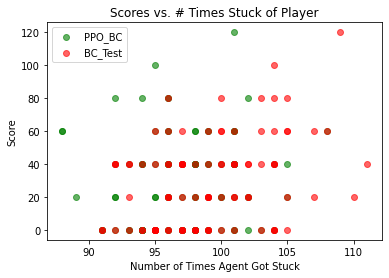

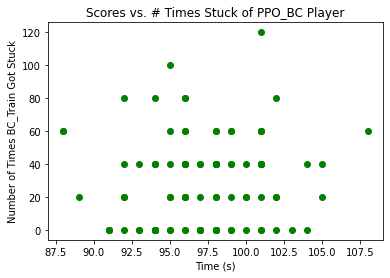

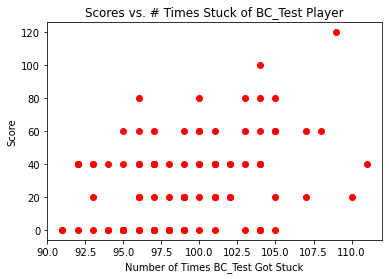

In [34]:
n_human_stuck = [work_distribution_data[trial_no]['n_human_stuck'] for trial_no in work_distribution_data]
n_robot_stuck = [work_distribution_data[trial_no]['n_robot_stuck'] for trial_no in work_distribution_data]
scores = [work_distribution_data[trial_no]['score'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.scatter(n_human_stuck, scores, color='g', alpha=0.6)
plt.scatter(n_robot_stuck, scores, color='r', alpha=0.6)
plt.title("Scores vs. # Times Stuck of Player")
plt.xlabel("Number of Times Agent Got Stuck")
plt.ylabel("Score")
plt.legend(['PPO_BC', 'BC_Test'])
# plt.xlim(0,61)
plt.show()



plt.scatter(n_human_stuck, scores, color='g')
plt.title("Scores vs. # Times Stuck of PPO_BC Player")
plt.xlabel("Time (s)")
plt.ylabel("Number of Times BC_Train Got Stuck")
# plt.xlim(0,61)
plt.show()

plt.scatter(n_robot_stuck, scores, color='r')
plt.title("Scores vs. # Times Stuck of BC_Test Player")
plt.xlabel("Number of Times BC_Test Got Stuck")
plt.ylabel("Score")
# plt.xlim(0,61)
plt.show()
